In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

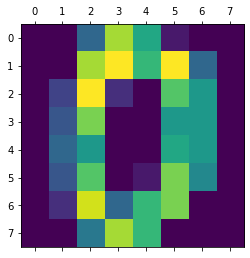

In [5]:
plt.matshow(digits.images[0])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [41]:
from scipy.cluster.vq import whiten
whitened_image = whiten(digits.images[0])
U, S, V = np.linalg.svd(digits.image[0])

AttributeError: image

In [42]:
print("U\n", U)
print(np.shape(U))
print("S\n", S)
print("V\n", V)
print(np.shape(V))

U
 [[-0.15823206  0.45138706 -0.41049617 -0.14523009 -0.01404138  0.54682809
   0.         -0.53140882]
 [-0.44368007  0.40091098  0.13060126  0.72165126 -0.21493772 -0.20452618
  -0.12505044 -0.03023848]
 [-0.44063649 -0.22487611  0.04563567  0.16636251  0.64516663  0.4548176
  -0.07771161  0.31043999]
 [-0.37447815 -0.3014337  -0.22720684 -0.13109646  0.31668017 -0.55994713
  -0.1348682  -0.51776255]
 [-0.32508672 -0.35637522 -0.39236825 -0.12562631 -0.5620267   0.1276913
  -0.43387994  0.27775823]
 [-0.38253812 -0.27263344  0.04589837 -0.01300303 -0.28505778  0.08080059
   0.8281329  -0.05889901]
 [-0.40270577  0.24898713  0.64021827 -0.56600727 -0.10593091 -0.00104197
  -0.18526211 -0.00673247]
 [-0.17183564  0.4803766  -0.44135214 -0.27739799  0.1694845  -0.34046051
   0.22749926  0.52112878]]
(8, 8)
S
 [12.12367496  5.31992938  1.85486732  1.60411155  1.17571772  0.157075
  0.         -0.        ]
V
 [[ 0.         -0.2912607  -0.73386032 -0.18519861 -0.20732527 -0.44328055
  -0.3

## Rank 1 approximation

In [54]:
new_image = U[:,0:1] @ V[0:1, :]
print(new_image)

[[0.         0.04608678 0.11612023 0.02930436 0.0328055  0.07014119
  0.05074201 0.        ]
 [0.         0.12922657 0.3255992  0.08216893 0.09198609 0.19667474
  0.14227976 0.        ]
 [0.         0.1283401  0.32336564 0.08160526 0.09135508 0.19532558
  0.14130375 0.        ]
 [0.         0.10907077 0.27481466 0.06935283 0.07763878 0.16599888
  0.12008803 0.        ]
 [0.         0.09468499 0.23856824 0.06020561 0.06739869 0.14410462
  0.10424913 0.        ]
 [0.         0.11141832 0.28072955 0.07084553 0.07930982 0.16957171
  0.1226727  0.        ]
 [0.         0.11729237 0.29552979 0.07458055 0.08349108 0.17851163
  0.12914009 0.        ]
 [0.         0.05004897 0.12610336 0.03182372 0.03562587 0.0761714
  0.05510442 0.        ]]


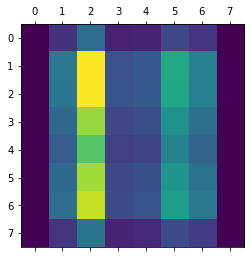

In [55]:
plt.matshow(new_image)

In [102]:
start, end = 0, 8

new_image = U[:,start:end] @ (np.expand_dims(S[start:end], axis=0).T * V[start:end,:])
print(new_image)

[[ 0.00000000e+00 -9.56773283e-16  1.42857143e+00  2.10887847e+00
   1.88691271e+00  1.99007438e-01 -3.72867151e-16  0.00000000e+00]
 [ 0.00000000e+00 -2.15339962e-15  3.71428571e+00  2.43332132e+00
   2.09656967e+00  2.98511157e+00  1.38675049e+00  0.00000000e+00]
 [ 0.00000000e+00  1.56226693e+00  4.28571429e+00  3.24442842e-01
  -1.57846708e-15  2.18908182e+00  2.21880078e+00  0.00000000e+00]
 [ 0.00000000e+00  2.08302258e+00  3.42857143e+00 -1.80022264e-15
  -1.24947231e-15  1.59205950e+00  2.21880078e+00  0.00000000e+00]
 [ 0.00000000e+00  2.60377822e+00  2.28571429e+00 -5.71472791e-16
  -3.85804689e-16  1.79106694e+00  2.21880078e+00  0.00000000e+00]
 [ 0.00000000e+00  2.08302258e+00  3.14285714e+00 -2.50664104e-16
   2.09656967e-01  2.38808926e+00  1.94145069e+00  0.00000000e+00]
 [ 0.00000000e+00  1.04151129e+00  4.00000000e+00  8.11107106e-01
   2.09656967e+00  2.38808926e+00  1.22124533e-15  0.00000000e+00]
 [ 0.00000000e+00 -1.66533454e-15  1.71428571e+00  2.10887847e+00
   

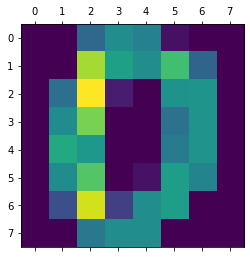

In [104]:
plt.matshow(new_image)

## Rank approx with sum is equal to just taking $U_{i}$

In [105]:
start, end = 0, 2

new_image = U[:,start:end] @ (np.expand_dims(S[start:end], axis=0).T * V[start:end,:])
print(new_image)

[[ 0.         -0.44140189  1.53632565  1.74081692  1.82603298  0.67868821
  -0.25682932  0.        ]
 [ 0.          0.67839826  4.06160868  2.22679261  2.38379928  2.23193792
   0.95045648  0.        ]
 [ 0.          2.05421396  3.85635177  0.29909456  0.39599094  2.45359342
   2.14754608  0.        ]
 [ 0.          1.99022838  3.2459375  -0.08444479 -0.0125497   2.12716393
   2.03823081  0.        ]
 [ 0.          1.93755431  2.79085444 -0.36398674 -0.31054697  1.88262149
   1.9523436   0.        ]
 [ 0.          1.95487628  3.32584789  0.02205507  0.09884114  2.1595258
   2.01392901  0.        ]
 [ 0.          0.87033115  3.65380024  1.66846062  1.80008077  2.06951712
   1.08464836  0.        ]
 [ 0.         -0.45759802  1.66561196  1.86034478  1.95195687  0.74077055
  -0.25994411  0.        ]]


In [106]:
start, end = 0, 1

new_image_a = U[:,start:end] @ (np.expand_dims(S[start:end], axis=0).T * V[start:end,:])
start, end = 1, 2

new_image_b = U[:,start:end] @ (np.expand_dims(S[start:end], axis=0).T * V[start:end,:])
new_image = new_image_a + new_image_b
print(new_image)

[[ 0.         -0.44140189  1.53632565  1.74081692  1.82603298  0.67868821
  -0.25682932  0.        ]
 [ 0.          0.67839826  4.06160868  2.22679261  2.38379928  2.23193792
   0.95045648  0.        ]
 [ 0.          2.05421396  3.85635177  0.29909456  0.39599094  2.45359342
   2.14754608  0.        ]
 [ 0.          1.99022838  3.2459375  -0.08444479 -0.0125497   2.12716393
   2.03823081  0.        ]
 [ 0.          1.93755431  2.79085444 -0.36398674 -0.31054697  1.88262149
   1.9523436   0.        ]
 [ 0.          1.95487628  3.32584789  0.02205507  0.09884114  2.1595258
   2.01392901  0.        ]
 [ 0.          0.87033115  3.65380024  1.66846062  1.80008077  2.06951712
   1.08464836  0.        ]
 [ 0.         -0.45759802  1.66561196  1.86034478  1.95195687  0.74077055
  -0.25994411  0.        ]]
